## Importing library & settings for library<a class="anchor" id="import"></a>


In [33]:
import numpy as np
import pandas as pd
import os
import math

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [35]:
from sklearn import preprocessing

In [36]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-07-27 14:05:18--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.194.113, 172.217.194.100, 172.217.194.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.194.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u8q73co3ac23osu5v94jfuuqhcbar4h4/1658930700000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b7744836-9b3b-4e91-aba6-a83f3ec53b7e [following]
--2022-07-27 14:05:20--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u8q73co3ac23osu5v94jfuuqhcbar4h4/1658930700000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b7744836-9b3b-4e91-aba6-a83f3ec53b7e
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.10.132, 2404:6800:4003:c0f::84
Connecting to do

## Loading the data & previewing<a class="anchor" id="load"></a>

In [109]:
df = pd.read_excel('Data Collection of specific estates_2022.07.22.xlsx')

In [110]:
df.head()

,id,rent,RVD Rent Index,RVD_average_rent,Month_index,year,month,property_with_phase,phase_block_others,floor_level,...,ind_mtr_East_Rail_line,ind_mtr_Kwun_Tong_line,ind_mtr_Island_line,ind_mtr_Tung_Chung_line,ind_mtr_Airport_Express,ind_mtr_Tseung_Kwan_O_line,ind_mtr_Tuen_Ma_line,ind_mtr_Disneyland_Resort_line,ind_mtr_South_Island_line,ind_mtr_Kowloon_Canton_railway
0,1,15800,NaN,NaN,202206,2022,6,日出康城 Montara,2B座,高層,...,0,0,0,0,0,1,0,0,0,0
1,2,18000,NaN,NaN,202206,2022,6,日出康城 首都,1座 R,低層,...,0,0,0,0,0,1,0,0,0,0
2,3,17800,NaN,NaN,202206,2022,6,日出康城 領都 - 領峯,8座 R,低層,...,0,0,0,0,0,1,0,0,0,0
3,4,13000,NaN,NaN,202206,2022,6,日出康城 晉海II,3A座,高層,...,0,0,0,0,0,1,0,0,0,0
4,5,15000,NaN,NaN,202206,2022,6,日出康城 Marini,3A座,高層,...,0,0,0,0,0,1,0,0,0,0


In [111]:
print(np.shape(df))

(31964, 50)


## Defining columns and preparing data according to columns<a class="anchor" id="define"></a>

### Defining columns - direct from source<a class="anchor" id="define_direct"></a>

In [112]:
col_drop_1st = ["id", "property_with_phase", "phase_block_others", "floor_level", "flat", "net_area_m2", "Unitrent_per_m", "download_source", "estate_ID", "estate_name", "Month_index", "CPI(A)", "CPI(B)", "CPI(C)"]
len(col_drop_1st)

14

In [113]:
col_drop_after_working = ["estate_earliest_date_move_in_year", "year", "month"]
len(col_drop_after_working)

3

In [114]:
col_values = ["floor_level_ind", "net_area_ft", "area_group", "bedroom", "mtr_distance_m"]
len(col_values)

5

In [115]:
col_values_RVD = ["RVD Rent Index", "RVD_average_rent"]
len(col_values)

5

In [116]:
col_categorical = ["RVD_size_class", "estate_region", "estate_district", "estate_region_RVD", "estate_primary_school", "estate_secondary_school", "estate_blding_manager", "ind_estate_Swimming_pool", "ind_estate_Clubhouse", "ind_estate_Kids_facilities", "ind_estate_Sports_facilities", "ind_estate_Catering_facility", "ind_estate_Entertainment_facility", "ind_estate_Mall", "ind_estate_Health_n_beauty", "ind_estate_Recreational_area", "estate_closest_mtr", "ind_mtr_Tsuen_Wan_line", "ind_mtr_East_Rail_line", "ind_mtr_Kwun_Tong_line", "ind_mtr_Island_line", "ind_mtr_Tung_Chung_line", "ind_mtr_Airport_Express", "ind_mtr_Tseung_Kwan_O_line", "ind_mtr_Tuen_Ma_line", "ind_mtr_Disneyland_Resort_line", "ind_mtr_South_Island_line"]
len(col_categorical)

27

In [117]:
col_response = ["rent", "Unitrent_perft"]
len(col_response)

2

### Defining columns - derivatives<a class="anchor" id="define_derivative"></a>

In [118]:
df["estate_year"] = df["estate_earliest_date_move_in_year"].apply(lambda x: 2022 - x)
col_values.append("estate_year")
df["estate_year"].head()

0    14
1    14
2    14
3    14
4    14
Name: estate_year, dtype: int64

In [119]:
def change_year_month_to_month(year, month):
    return((year - 2022) * 12 + (month - 6))

df["month_from_now"] = df[["year", "month"]].apply(lambda x: change_year_month_to_month(x["year"], x["month"]), axis=1)
col_values.append("month_from_now")
df["month_from_now"].head()

0    0
1    0
2    0
3    0
4    0
Name: month_from_now, dtype: int64

In [120]:
df[col_categorical].fillna('others')

,RVD_size_class,estate_region,estate_district,estate_region_RVD,estate_primary_school,estate_secondary_school,estate_blding_manager,ind_estate_Swimming_pool,ind_estate_Clubhouse,ind_estate_Kids_facilities,...,ind_mtr_Tsuen_Wan_line,ind_mtr_East_Rail_line,ind_mtr_Kwun_Tong_line,ind_mtr_Island_line,ind_mtr_Tung_Chung_line,ind_mtr_Airport_Express,ind_mtr_Tseung_Kwan_O_line,ind_mtr_Tuen_Ma_line,ind_mtr_Disneyland_Resort_line,ind_mtr_South_Island_line
0,B,KL,康城,New Territories,95,中學: 西貢,港鐵公司,1,1,1,...,0,0,0,0,0,0,1,0,0,0
1,B,KL,康城,New Territories,95,中學: 西貢,港鐵公司,1,1,1,...,0,0,0,0,0,0,1,0,0,0
2,B,KL,康城,New Territories,95,中學: 西貢,港鐵公司,1,1,1,...,0,0,0,0,0,0,1,0,0,0
3,A,KL,康城,New Territories,95,中學: 西貢,港鐵公司,1,1,1,...,0,0,0,0,0,0,1,0,0,0
4,B,KL,康城,New Territories,95,中學: 西貢,港鐵公司,1,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31959,B,NT,元朗市中心,New Territories,74,中學: 元朗,啟勝管理服務有限公司,1,1,1,...,0,0,0,0,0,0,0,1,0,0
31960,B,NT,第一城 / 石門,New Territories,91,中學: 沙田,百得物業管理有限公司,1,0,1,...,0,0,0,0,0,0,0,1,0,0
31961,B,NT,第一城 / 石門,New Territories,91,中學: 沙田,百得物業管理有限公司,1,0,1,...,0,0,0,0,0,0,0,1,0,0
31962,C,NT,錦田,New Territories,74,中學: 元朗,超卓管理服務有限公司,1,1,0,...,0,0,0,0,0,0,0,1,0,0


### Preparing data<a class="anchor" id="prepare"></a>

In [121]:
df[col_categorical] = df[col_categorical].astype("category")

In [122]:
col_drop = col_drop_1st + col_drop_after_working

## Exploratory analysis for data (Values)<a class="anchor" id="ex_values"></a>


### Exploratory analysis for data (Values) - Codes<a class="anchor" id="ex_values_codes"></a>


In [123]:
data = df[col_values + col_values_RVD + col_response].copy()

In [124]:
data["log_rent"] = data["rent"].apply(np.log1p)
data["log_Unitrent_perft"] = data["Unitrent_perft"].apply(np.log1p)

In [125]:
print(data.describe())

       floor_level_ind   net_area_ft    area_group       bedroom  \
count     31964.000000  31964.000000  31964.000000  31964.000000   
mean          1.975222    574.013546      3.630428      2.265611   
std           0.850903    222.297007      0.914676      0.760887   
min           0.000000    173.000000      1.000000      0.000000   
25%           1.000000    441.000000      3.000000      2.000000   
50%           2.000000    528.000000      3.000000      2.000000   
75%           3.000000    680.000000      4.000000      3.000000   
max           3.000000   4190.000000      9.000000     10.000000   

       mtr_distance_m   estate_year  month_from_now  RVD Rent Index  \
count    31964.000000  31964.000000    31964.000000    30689.000000   
mean       651.426645     20.863972      -16.089319      182.089690   
std        861.809569     13.513698       10.363158       14.808143   
min         26.510318      2.000000      -36.000000      132.400000   
25%        175.801766     10.000

In [126]:
%matplotlib inline
def plot_subplots_box(data, n_row = 1):
  fig, axs = plt.subplots(ncols=math.ceil(np.shape(data)[1] / n_row), nrows=n_row, figsize=(20, 10))
  index = 0
  axs = axs.flatten()
  for k,v in data.items():
      sns.boxplot(x=None, y=str(k), data=data, ax=axs[index])
      index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [127]:
%matplotlib inline
def plot_subplots_regplot(data, y, n_row = 1):
  min_max_scaler = preprocessing.MinMaxScaler()
  x = pd.DataFrame(data=min_max_scaler.fit_transform(data), columns=data.columns)
  fig, axs = plt.subplots(ncols=math.ceil(np.shape(data)[1] / n_row), nrows=n_row, figsize=(20, 10))
  index = 0
  axs = axs.flatten()
  for i, k in enumerate(data.columns):
      sns.regplot(y=y, x=x[k], ax=axs[i], line_kws={"color": "red"})
      index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Exploratory analysis for data (Values) - Results<a class="anchor" id="ex_values_results"></a>


In [128]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column floor_level_ind outliers = 0.00%
Column net_area_ft outliers = 3.13%
Column area_group outliers = 3.02%
Column bedroom outliers = 2.11%
Column mtr_distance_m outliers = 9.22%
Column estate_year outliers = 0.00%
Column month_from_now outliers = 0.00%
Column RVD Rent Index outliers = 6.70%
Column RVD_average_rent outliers = 0.13%
Column rent outliers = 4.79%
Column Unitrent_perft outliers = 2.67%
Column log_rent outliers = 2.03%
Column log_Unitrent_perft outliers = 0.76%


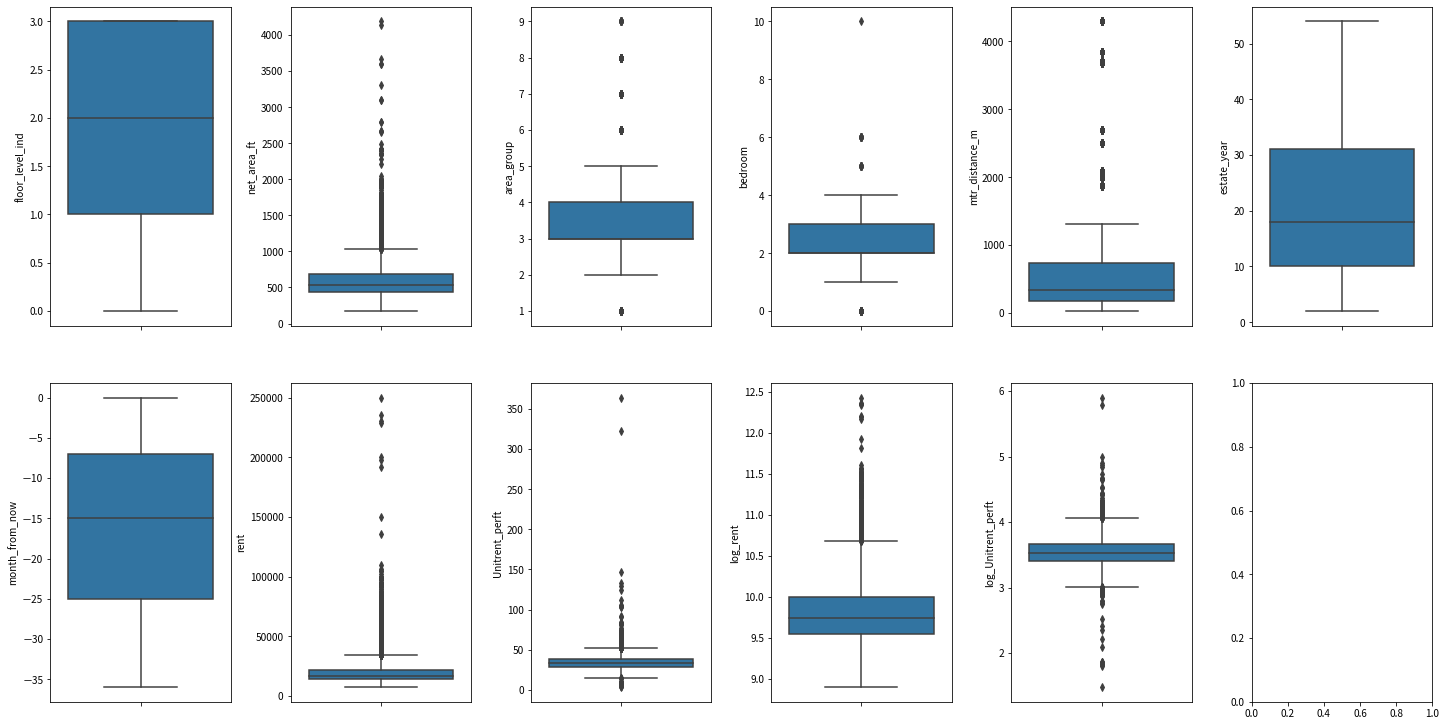

In [129]:
plot_subplots_box(data.drop(columns=col_values_RVD, axis=1), 2)

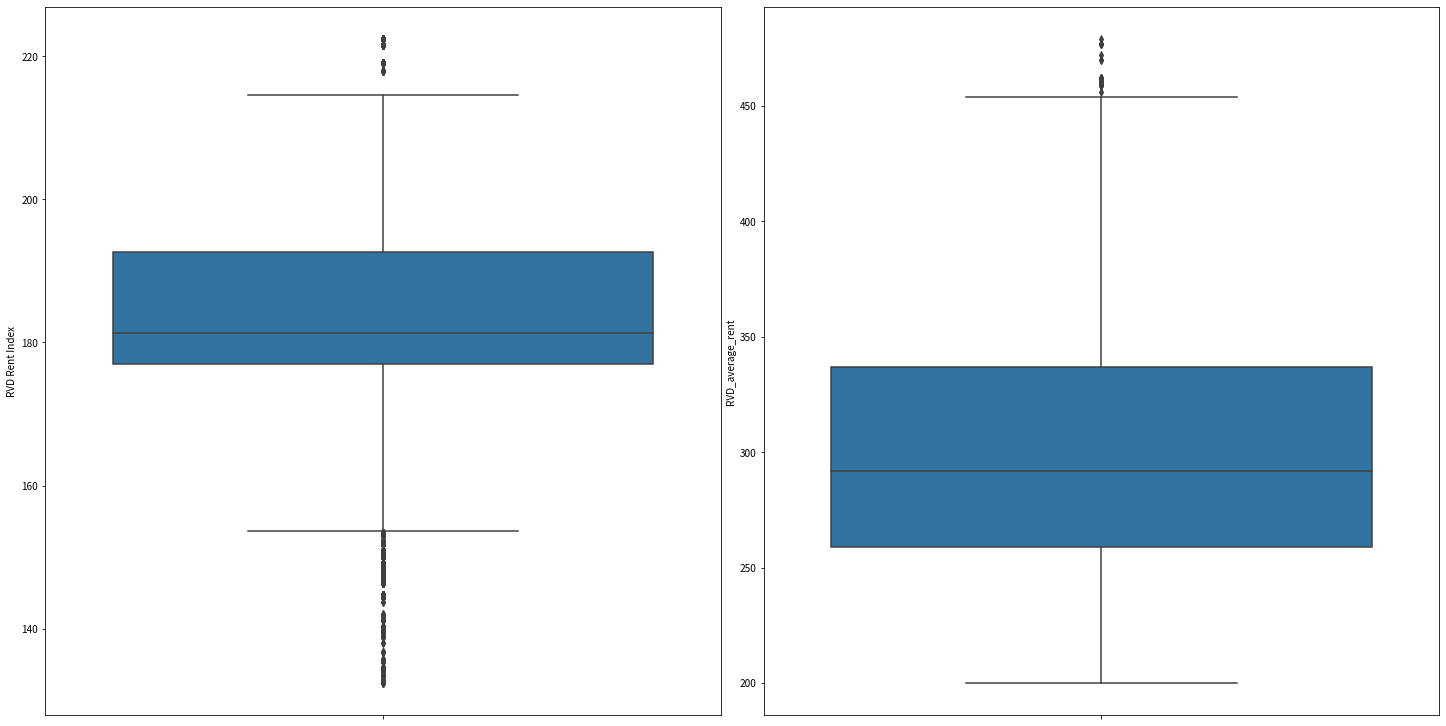

In [130]:
plot_subplots_box(data[col_values_RVD].dropna(), 1)

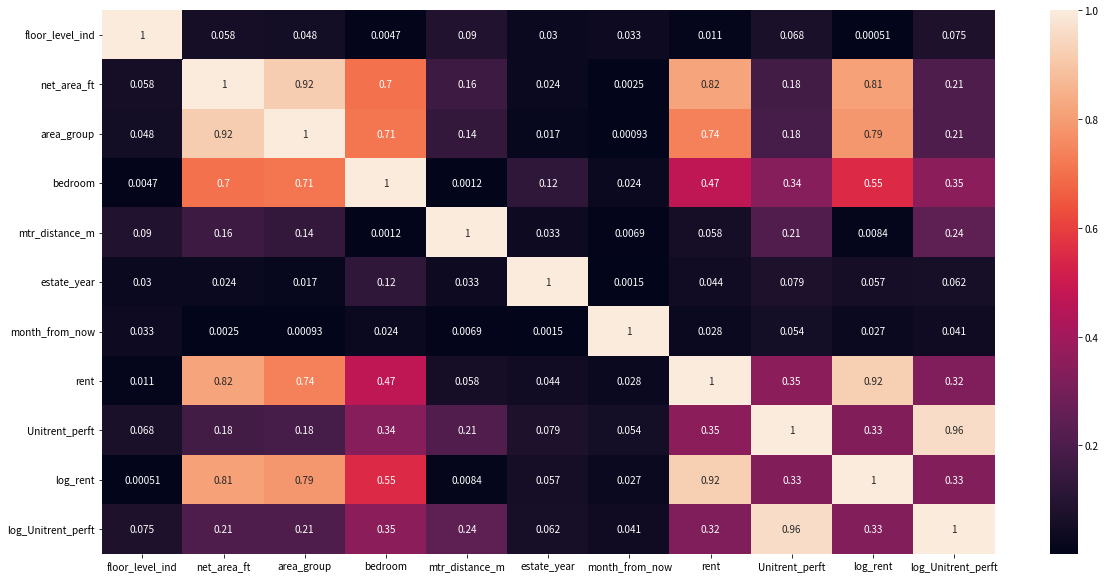

In [131]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.drop(columns=col_values_RVD, axis=1).corr().abs(),  annot=True)

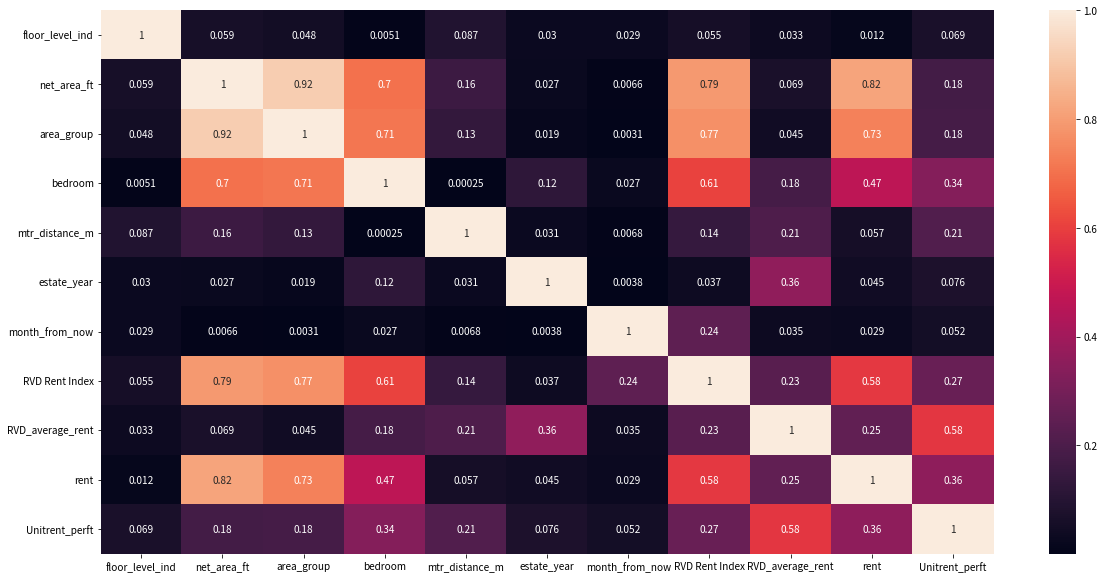

In [132]:
plt.figure(figsize=(20, 10))
sns.heatmap(data[col_values + col_values_RVD + col_response].dropna().corr().abs(),  annot=True)

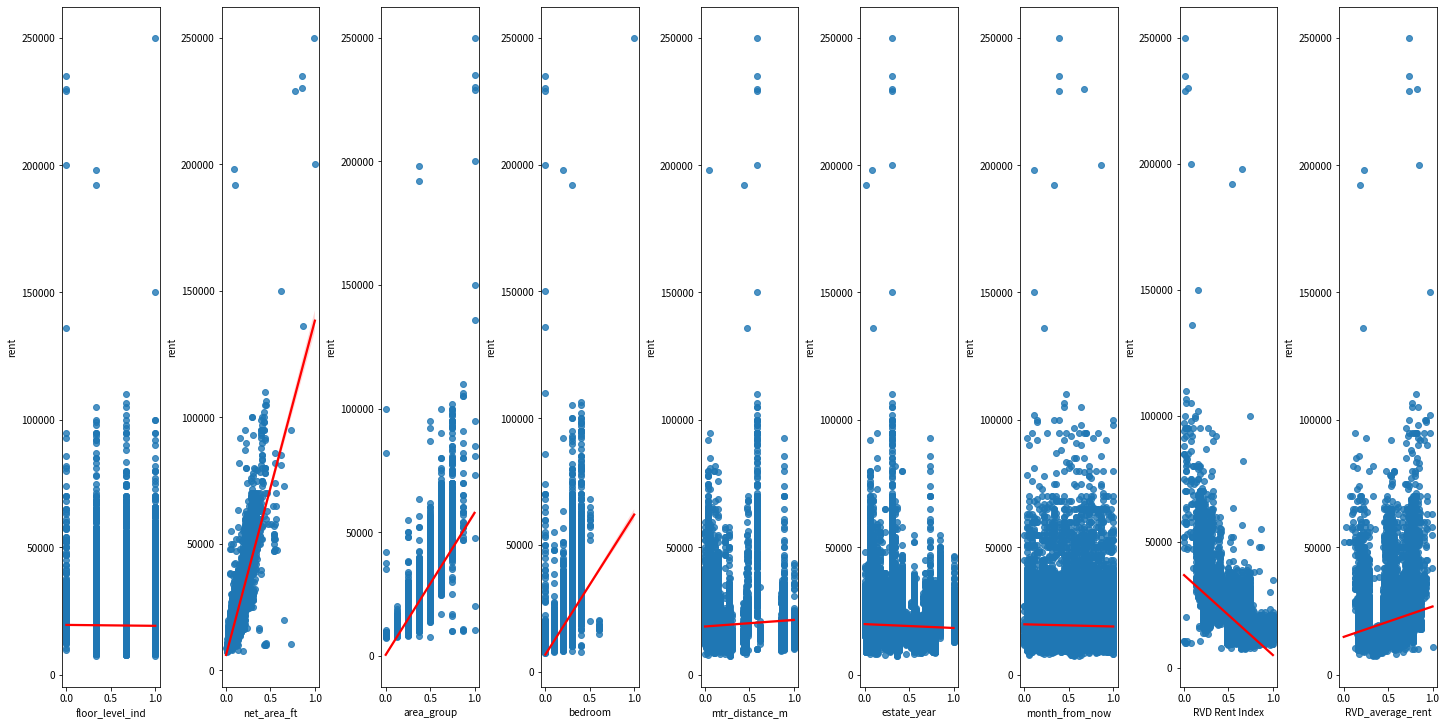

In [133]:
plot_subplots_regplot(data[col_values + col_values_RVD], data["rent"])

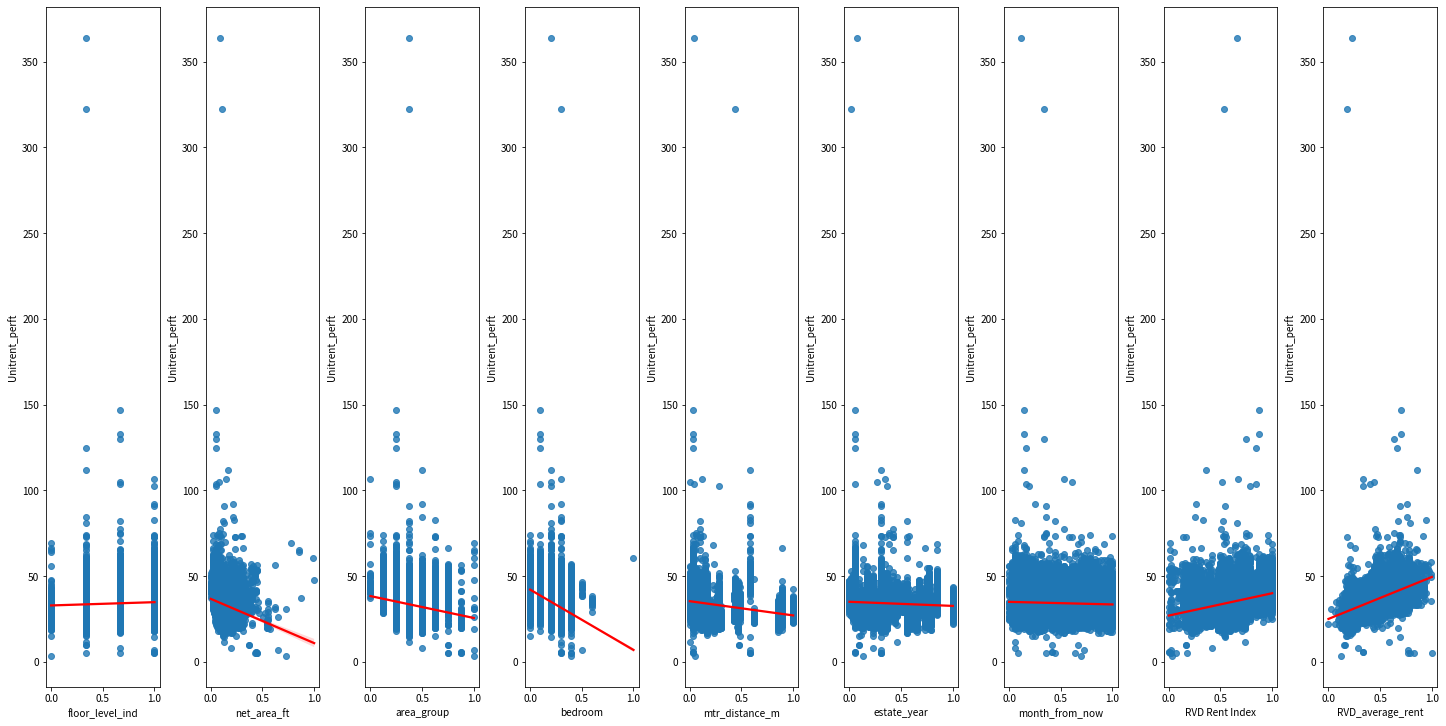

In [134]:
plot_subplots_regplot(data[col_values + col_values_RVD], data["Unitrent_perft"])

## Exploratory analysis for data (Categorical)<a class="anchor" id="ex_cat"></a>


### Exploratory analysis for data (Categorical) - Codes<a class="anchor" id="ex_cat_codes"></a>


In [135]:
data_cat = df[col_categorical + col_response].copy()

In [150]:
%matplotlib inline
def plot_subplots_stripplot(data, y, n_row = 1):
  fig, axs = plt.subplots(ncols=math.ceil(np.shape(data)[1] / n_row), nrows=n_row, figsize=(20, 10))
  index = 0
  axs = axs.flatten()
  for i, k in enumerate(data.columns):
      sns.stripplot(y=y, x=data[k], ax=axs[i])
      index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Exploratory analysis for data (Categorical) - Results<a class="anchor" id="ex_cat_result"></a>


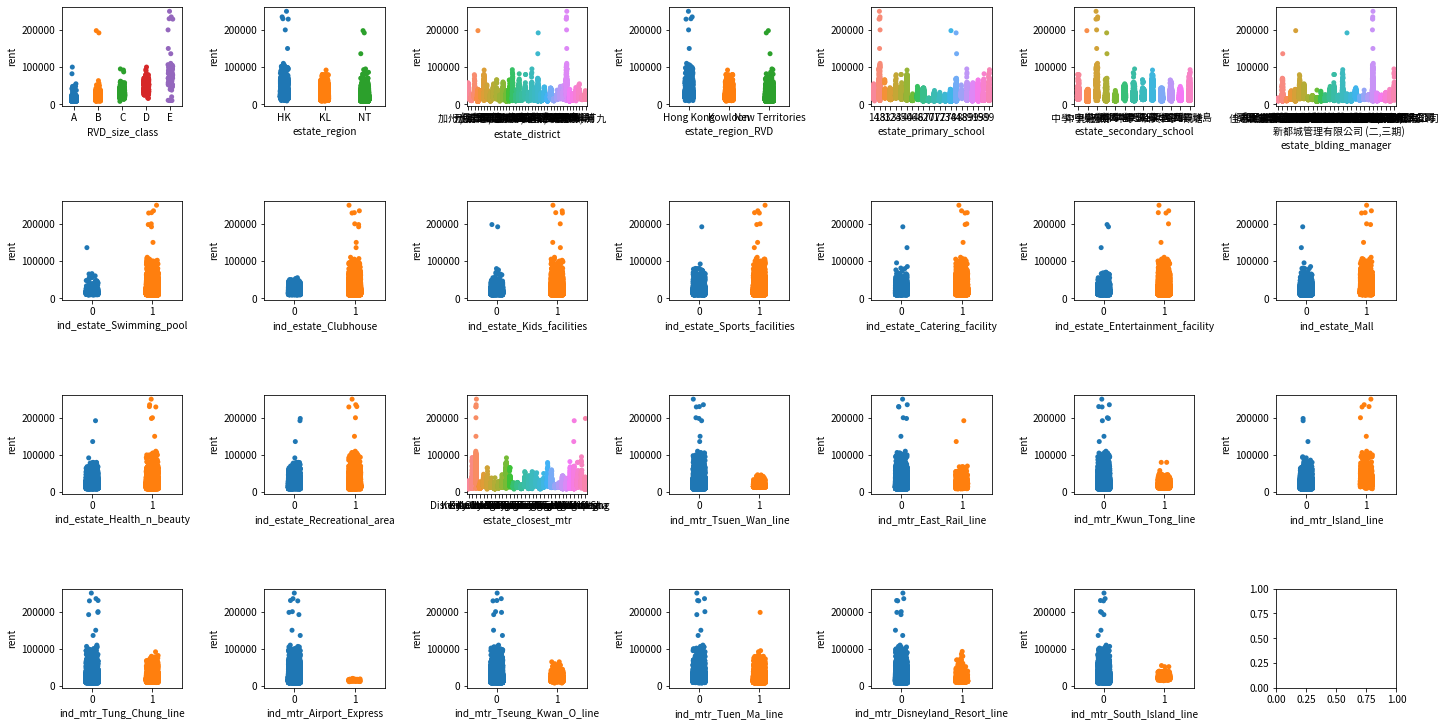

In [151]:
plot_subplots_stripplot(data_cat[col_categorical], data_cat["rent"], 4)

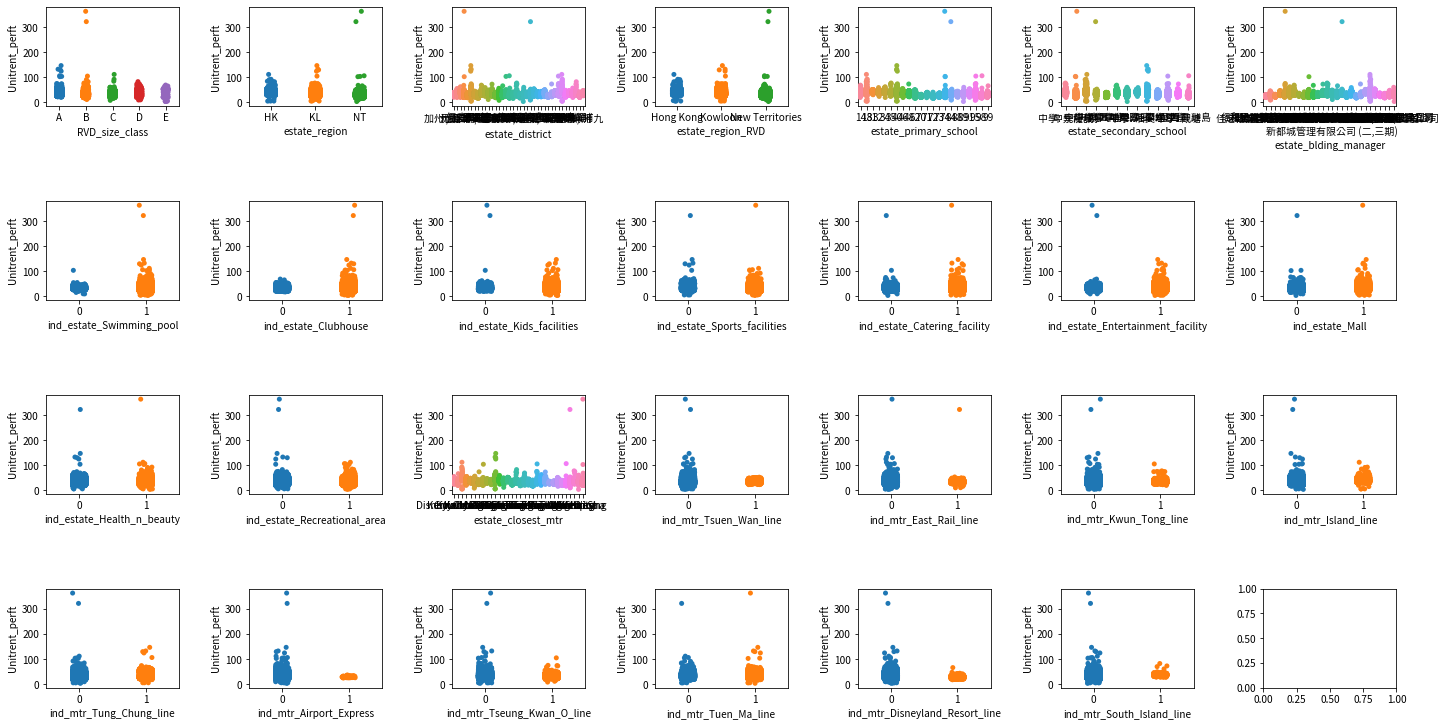

In [152]:
plot_subplots_stripplot(data_cat[col_categorical], data_cat["Unitrent_perft"], 4)

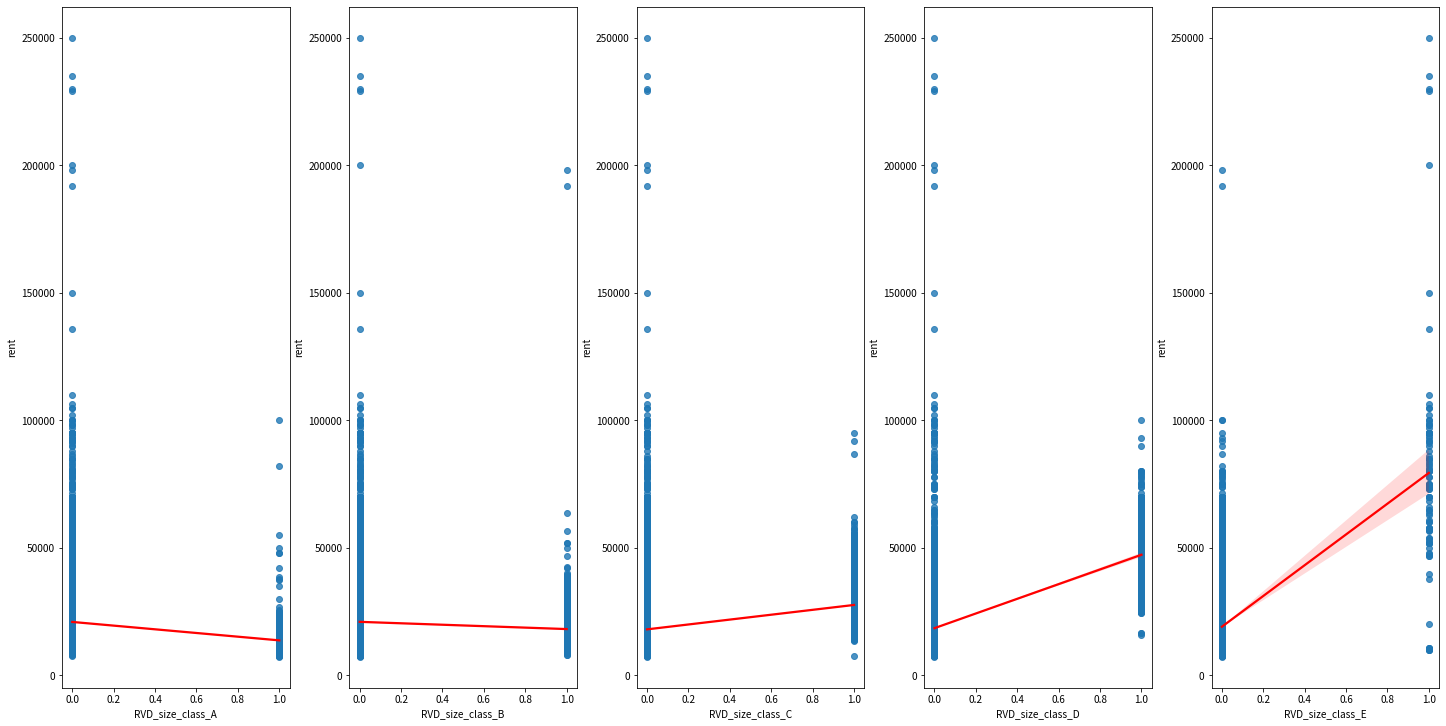

In [78]:
item = col_categorical[0]
plot_list = [x for x in data_dummy_visualise.columns if x.startswith(item)]
plot_subplots_regplot(data_dummy_visualise[plot_list], data["rent"], math.ceil(len(plot_list) / 8))

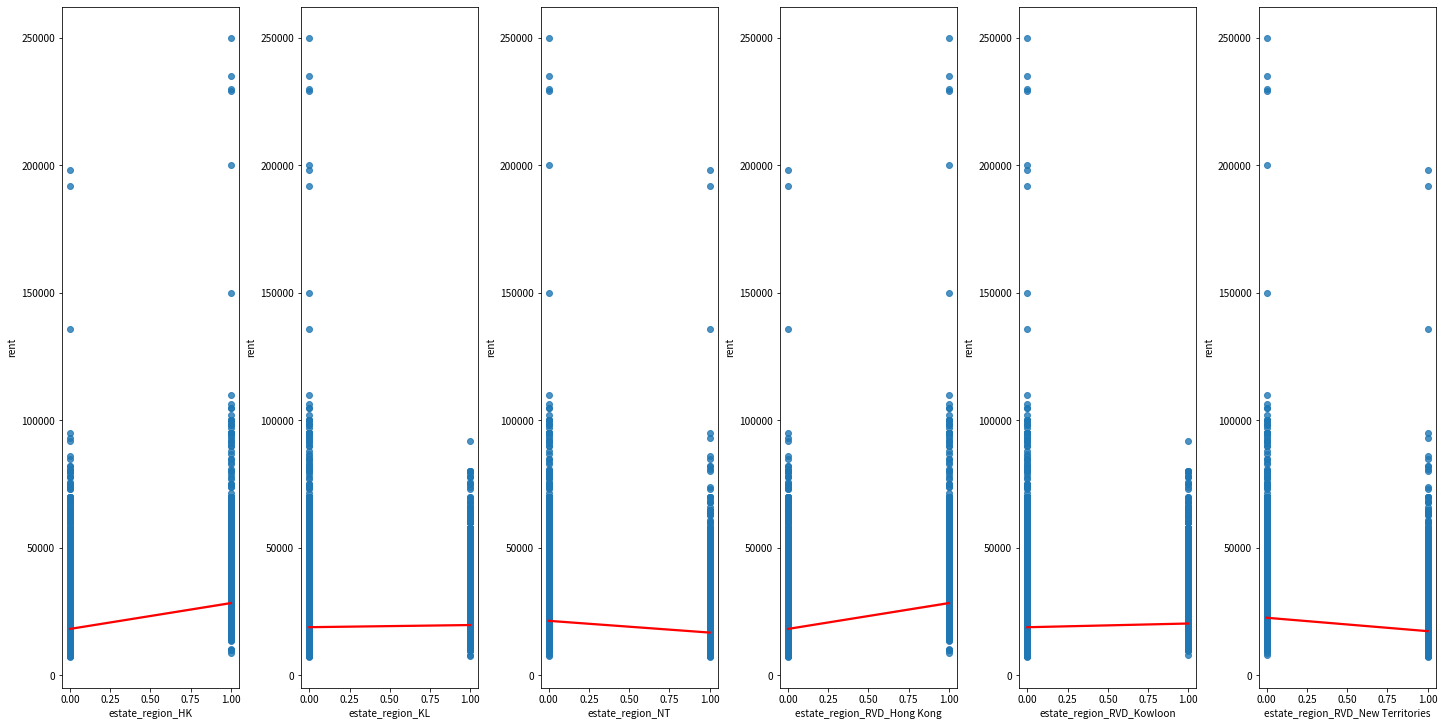

In [79]:
item = col_categorical[1]
plot_list = [x for x in data_dummy_visualise.columns if x.startswith(item)]
plot_subplots_regplot(data_dummy_visualise[plot_list], data["rent"], math.ceil(len(plot_list) / 8))

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
X = pd.get_dummies(X[X.columns[X.dtypes == 'category']],drop_first=True)
X.head()

In [ ]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)

In [ ]:
data = data.fillna(axis=0, method='ffill')

In [ ]:
print(data.describe())

In [ ]:
sns.countplot(data=data, x="year")

In [74]:
data_dummy_visualise = pd.get_dummies(data_cat[data_cat.columns[data_cat.dtypes == 'category']], drop_first=False)

In [ ]:
sns.countplot(data=data, x="month")

In [ ]:
sns.histplot(data=data, x="estate_earliest_year_move_in")

In [ ]:
col_cat = ["floor_level", "flat", "estate_region", "estate_district", "estate_primary_school", "estate_secondary_school", "estate_blding_manager", "ind_estate_泳池", "ind_estate_會所", "ind_estate_兒童設施", "ind_estate_運動設施", "ind_estate_餐飲設施", "ind_estate_娛樂設施", "ind_estate_基座商場", "ind_estate_美容_保健", "ind_estate_休閒區", "estate_closest_mtr", "ind_mtr_Tsuen_Wan_line", "ind_mtr_East_Rail_line", "ind_mtr_Kwun_Tong_line", "ind_mtr_Island_line", "ind_mtr_Tung_Chung_line", "ind_mtr_Airport_Express", "ind_mtr_Tseung_Kwan_O_line", "ind_mtr_Tuen_Ma_line", "ind_mtr_Disneyland_Resort_line", "ind_mtr_South_Island_line", "ind_mtr_Kowloon_Canton_railway"]
len(col_cat)

In [ ]:
data[col_cat] = df[col_cat].astype("category")

In [ ]:
data['rent'] = df['rent']

In [ ]:
data = df.copy()

In [ ]:
data[col_cat] = df[col_cat].astype("category")

In [ ]:
data.drop(columns='id').info()

In [ ]:
data.isnull().sum()

In [ ]:
data = data.fillna(axis=0, method='ffill')

In [ ]:
data.isnull().sum()

In [ ]:
corr = data.drop(columns='id').corr()

In [ ]:
corr

In [ ]:
columns_to_drop = ['property_with_phase', 'phase_block_others', 'download_source', "estate_ID"]

In [ ]:
X = df.dropna().drop(columns=col_response + col_drop_1st + col_drop_after_working + ['Month_index'], axis=1)
y = df.dropna()['Unitrent_perft']
X.head()

In [ ]:
for i in X.columns:
  print(i)

In [ ]:
y.head()

In [ ]:
X_train = X
y_train = y

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train, y_train)
dtr.score(X_train, y_train) # Coefficient of determination

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(60,10))
_ = tree.plot_tree(dtr, feature_names=X.columns, filled=True)